#Preparando a base de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
valores_ausentes = [-99]
df = pd.read_csv('/content/drive/MyDrive/mestrado/dados mestrado/dados.csv', sep=',', na_values= valores_ausentes)

In [ ]:
conditionlist = [
    ((df['Month'] == 3) & (df['Day'] > 21)), #INVERNO
    (3 < df['Month']) & (df['Month'] < 6),
    ((df['Month'] == 6) & (df['Day'] <= 21)),
    ((df['Month'] == 6) & (df['Day'] > 21)), #OUTONO
    (6 < df['Month']) & (df['Month'] < 9),
    ((df['Month'] == 9) & (df['Day'] <= 23)),
    ((df['Month'] == 9) & (df['Day'] > 23)), #PRIMAVERA
    (9 < df['Month']) & (df['Month'] < 12),
    ((df['Month'] == 12) & (df['Day'] <= 21)),
    ((df['Month'] == 12) & (df['Day'] > 21)), #VERÃO
    (3 > df['Month']),
    ((df['Month'] == 3) & (df['Day'] <= 21))]

choicelist = ['Outono', 'Outono', 'Outono', 'Inverno','Inverno','Inverno',
              'Primavera','Primavera','Primavera', 'Verão', 'Verão', 'Verão']

df['Estação'] = np.select(conditionlist, choicelist, default='Not Specified')

#Análisando a base

In [ ]:
df.isnull().sum()

Unnamed: 0                                           0
Date_Time                                            0
apparent_zenith                                      0
zenith                                               0
apparent_elevation                                   0
elevation                                            0
azimuth                                              0
equation_of_time                                     0
Temp                                               233
Irrad                                              233
Pot_BT                                             157
ghi                                                  0
dni                                                  0
dhi                                                  0
Irradiação Global horária(horizontal) kWh/m2       265
Irradiação Difusa horária kWh/m2                   265
Irradiação Global horária(Inclinada 27°) kWh/m2    265
Temperatura ambiente °C                            265
Umidade Re

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31142 entries, 0 to 31141
Data columns (total 31 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Unnamed: 0                                       31142 non-null  int64  
 1   Date_Time                                        31142 non-null  object 
 2   apparent_zenith                                  31142 non-null  float64
 3   zenith                                           31142 non-null  float64
 4   apparent_elevation                               31142 non-null  float64
 5   elevation                                        31142 non-null  float64
 6   azimuth                                          31142 non-null  float64
 7   equation_of_time                                 31142 non-null  float64
 8   Temp                                             30909 non-null  float64
 9   Irrad                       

In [ ]:
def analise_dia (dia, mes, ano):
  if dia < 10:
    dia = '0' + str(dia)
  else:
    dia = str(dia)

  if mes < 10:
    mes = '0' + str(mes)
  else:
    mes = str(mes)

  ano = str(ano)
  primeiro = '{2}-{1}-{0} 00:00:00'.format(dia,mes,ano)
  segundo = '{2}-{1}-{0} 23:00:00'.format(dia,mes,ano)
  t = df.loc[(df['Date_Time'] >= primeiro) & (df['Date_Time'] <= segundo)]
  fig, ax = plt.subplots()
  ax= sns.lineplot(data=t, x = 'Hour', y = "Irrad", label = 'Sistema', color = 'b')
  ax1 = sns.lineplot(data=t, x = 'Hour', y = 'Irradiação Global horária(Inclinada 27°) kWh/m2', label = 'Estação Metereológica', color = 'r')
  ax2 = sns.lineplot(data=t,  x = 'Hour', y = 'ghi', label = 'Céu Claro', color = 'g')
  #ax3 = sns.lineplot(data=t,  x = 'Hour', y = 'Pot_BT', label = 'Potência')
  plt.xticks(rotation = 45)
  plt.show()

  return plt.show()

Index(['2018_7', '2018_9', '2018_10', '2019_2', '2019_3', '2019_9', '2019_10',
       '2019_11', '2019_12', '2020_1', '2020_2', '2020_3', '2020_4'],
      dtype='object') 



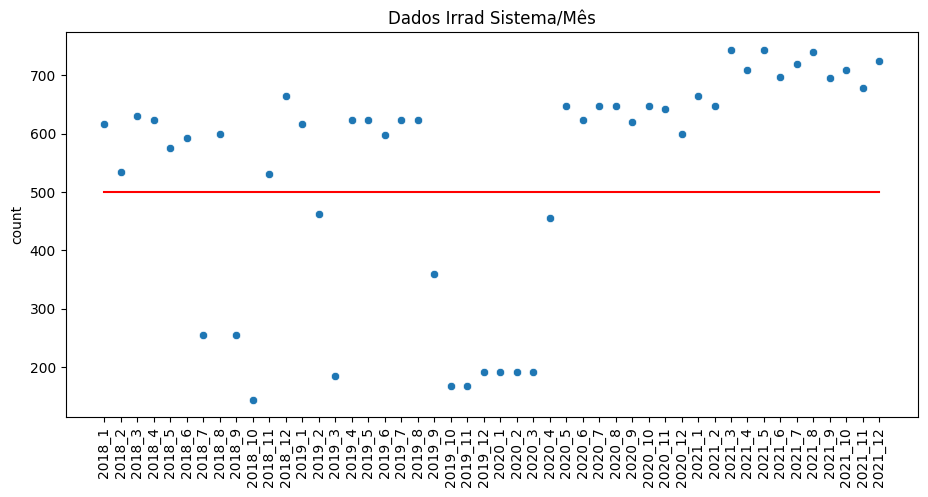

None


In [ ]:
df_desc = pd.DataFrame()
target = 'Irrad'
for i in range (2018,2022):
  for j in range (1,13):
    a = '{0}_{1}'.format(i,j)
    df_desc[a] = df[target].loc[(df['Month'] == j) & (df['Year'] == i)].describe()

ax, fig = plt.subplots(figsize = (11,5))
ax = sns.scatterplot(data = df_desc.T,
                     x = df_desc.T.index,
                     y ='count')

ax1 = sns.lineplot(data = df_desc.T,
                   x= df_desc.T.index,
                   y = 500,
                   color = 'r')
plt.xticks(rotation = 90)
plt.title("Dados Irrad Sistema/Mês")

print(df_desc.T.query('count < 500').index, '\n')
print(plt.show())

Index(['2018_7', '2018_9', '2018_10', '2019_2', '2019_3', '2019_9', '2019_10',
       '2019_11', '2019_12', '2020_1', '2020_2', '2020_3', '2020_4'],
      dtype='object') 



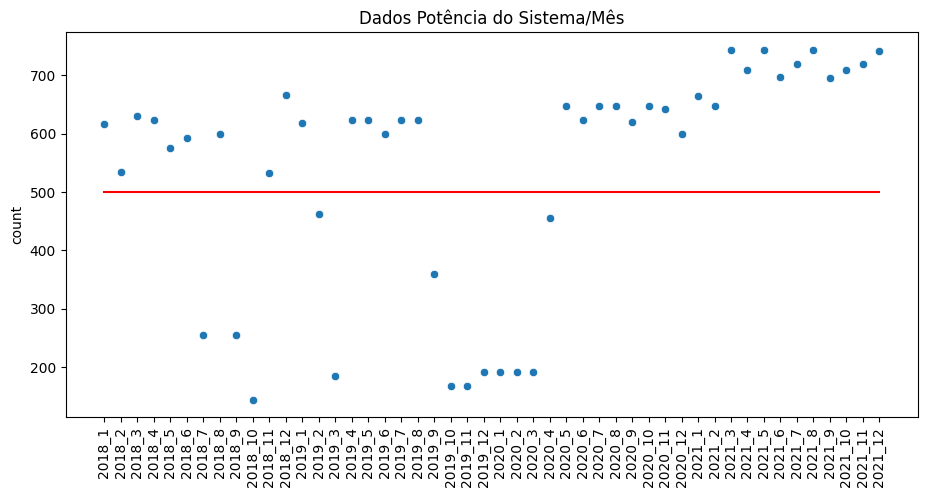

None


In [ ]:
df_desc = pd.DataFrame()
target = 'Pot_BT'
for i in range (2018,2022):
  for j in range (1,13):
    a = '{0}_{1}'.format(i,j)
    df_desc[a] = df[target].loc[(df['Month'] == j) & (df['Year'] == i)].describe()

ax, fig = plt.subplots(figsize = (11,5))
ax = sns.scatterplot(data = df_desc.T,
                     x = df_desc.T.index,
                     y ='count')

ax1 = sns.lineplot(data = df_desc.T,
                   x= df_desc.T.index,
                   y = 500,
                   color = 'r')
plt.xticks(rotation = 90)
plt.title("Dados Potência do Sistema/Mês")

print(df_desc.T.query('count < 500').index, '\n')
print(plt.show())

Meses com menor quantidade de dados:
* Irrad:
  * '2018_7', '2018_10', '2019_2', '2019_3', '2019_10', '2019_11',
'2019_12', '2020_1', '2020_2', '2020_3'
* Potência:
  * '2018_7', **'2018_9'**, '2018_10', '2019_2', '2019_3', '2019_10', '2019_11', '2019_12', '2020_1', '2020_2', '2020_3', **'2020_4'**

---

>Fevereiro: 672/692 Dados

>30 Dias no mês: 720 Dados

>31 Dias no mês: 744 Dados


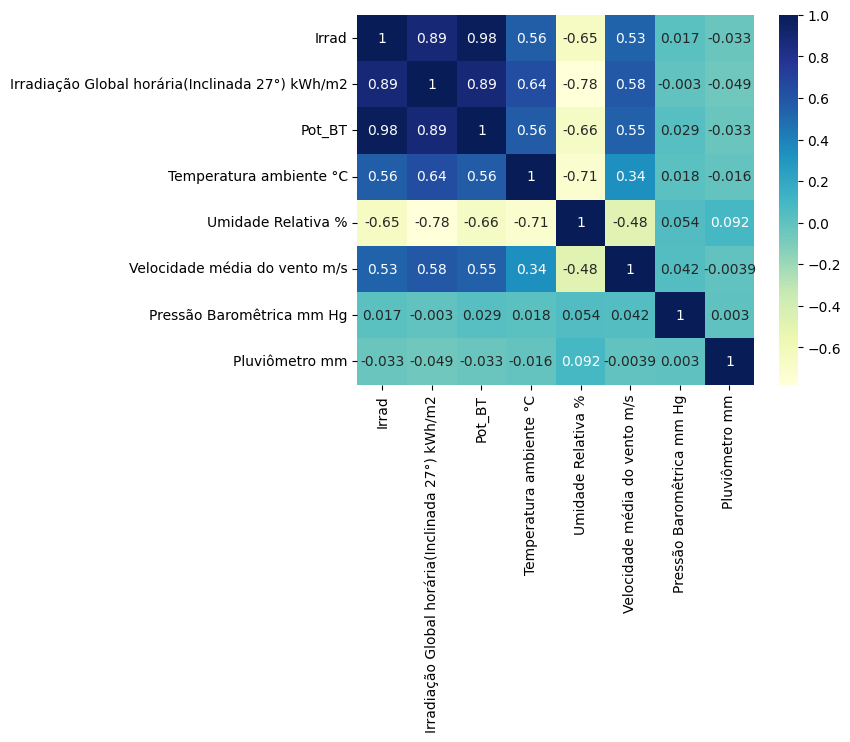

In [ ]:
ax = sns.heatmap(df[['Irrad',
                     'Irradiação Global horária(Inclinada 27°) kWh/m2',
                     'Pot_BT',
                     'Temperatura ambiente °C',
                     'Umidade Relativa %',
                     'Velocidade média do vento m/s',
                     'Pressão Baromêtrica mm Hg',
                     'Pluviômetro mm']].corr(), cmap="YlGnBu", annot=True)

##Analise dados metereológicos

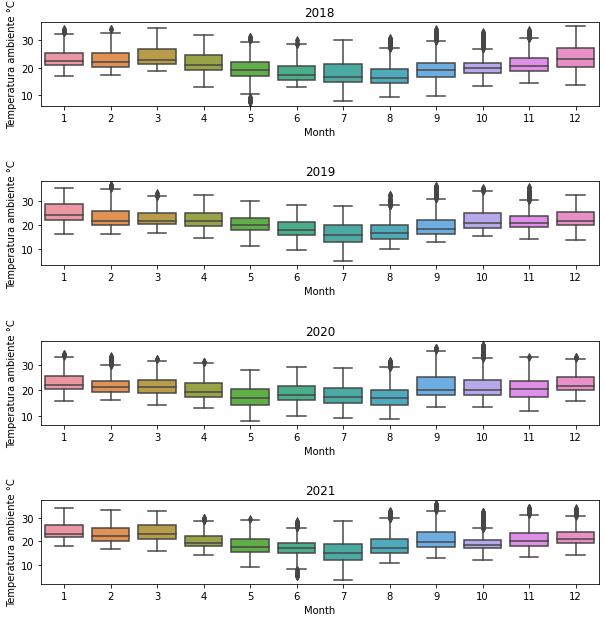

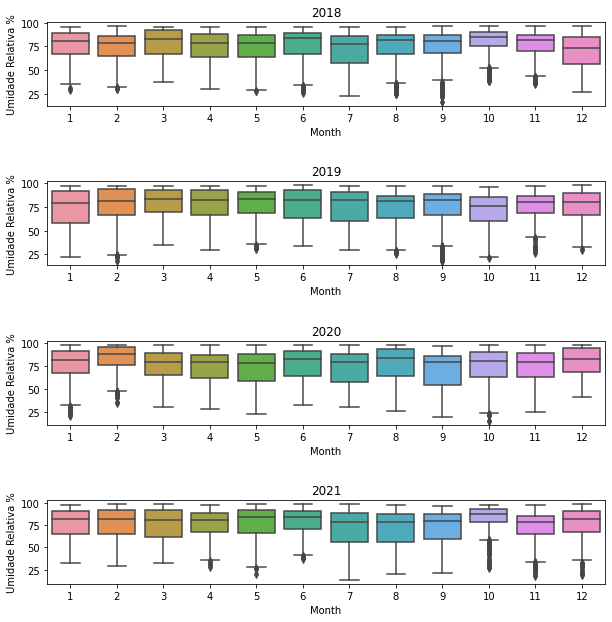

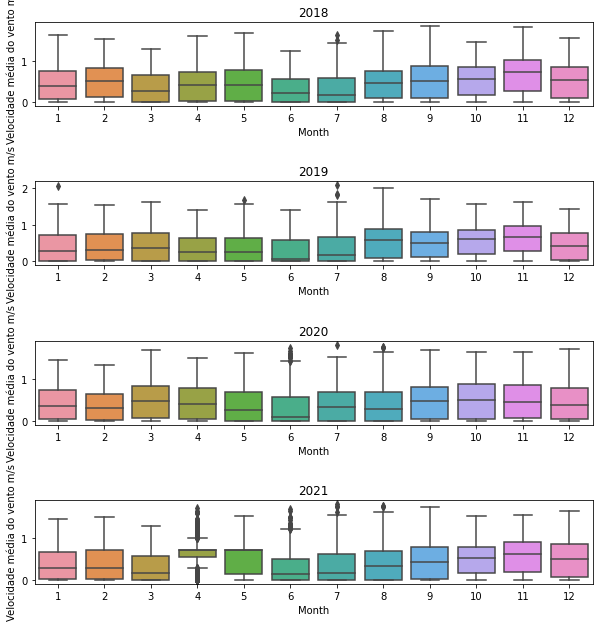

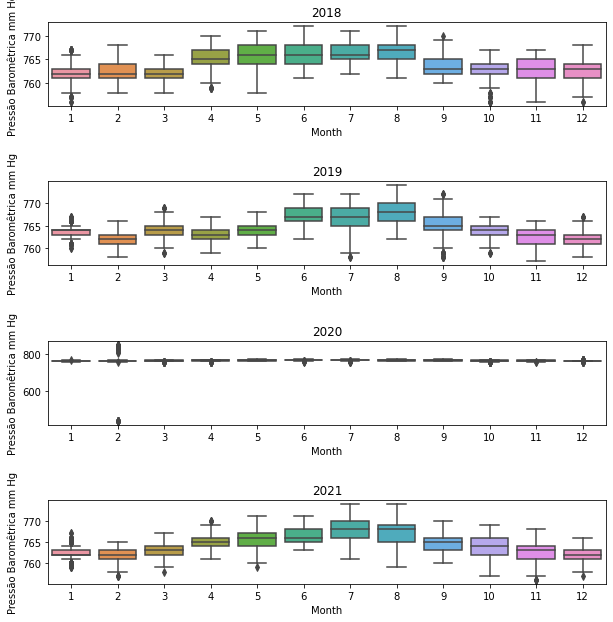

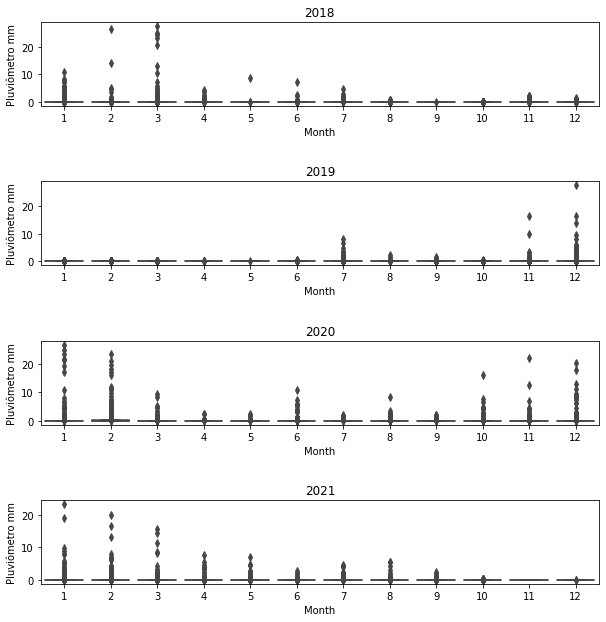

In [ ]:
target = ['Temperatura ambiente °C',
          'Umidade Relativa %',
          'Velocidade média do vento m/s',
          'Pressão Baromêtrica mm Hg',
          'Pluviômetro mm']

for target in target:
  j = 0
  fig = plt.figure()
  fig.subplots_adjust(hspace=0.9, wspace=0.1, bottom = 0.1)
  fig.set_figheight(10)
  fig.set_figwidth(10)

  for i in range(2018,2022):
      j += 1
      count = []
      df_mes = df.loc[(df['Year'] == i)]
      ax = fig.add_subplot(4, 1, j)
      ax = sns.boxplot(data = df_mes,
                      y = target,
                      x = 'Month')
      plt.title(str(i))
  plt.show()
  print('\n')

Pressão Barométrica - 2020: Todos os dados próximo da faixa de 800 com pouca variação entre os dados

Pluviômetro - todos os anos: Muitos dados próximo de zeros (3° quartil = 0), aparentemente esse dado não será muito útil

###Analise pluviometro

In [ ]:
plu = df.loc[df['Pluviômetro mm'] != 0]

In [ ]:
plu['Condicao_ceu'].value_counts()

Not Specified               1713
Céu nublado                  633
Céu parcialmente nublado     327
Céu claro                     66
Céu claro (maior que 1)       49
Name: Condicao_ceu, dtype: int64

In [ ]:
plu['Irradiação Global horária(Inclinada 27°) kWh/m2'].loc[plu['Condicao_ceu'] != 'Not Specified'].describe()

count    1075.000000
mean      228.749767
std       227.943342
min         0.000000
25%        58.500000
50%       140.000000
75%       327.500000
max      1002.000000
Name: Irradiação Global horária(Inclinada 27°) kWh/m2, dtype: float64

In [ ]:
from sklearn.metrics import mutual_info_score
from scipy.stats import kendalltau

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


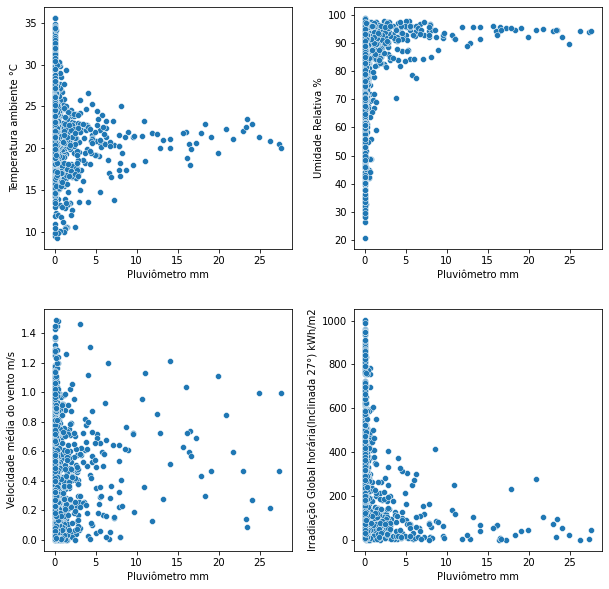

Temperatura ambiente °C  Umidade Relativa %  \
Correlação de Person                  0.026994        1.420504e-01   
Correlação de Kendall                -0.008537        1.785292e-01   
P-Kendall                             0.537376        6.831601e-38   
Mutual Information                    1.537744        9.091667e-01   

                       Velocidade média do vento m/s  \
Correlação de Person                        0.054084   
Correlação de Kendall                       0.010768   
P-Kendall                                   0.439395   
Mutual Information                          1.472777   

                       Irradiação Global horária(Inclinada 27°) kWh/m2  
Correlação de Person                                         -0.091239  
Correlação de Kendall                                        -0.060174  
P-Kendall                                                     0.000056  
Mutual Information                                            0.721921

In [ ]:
df_cor = pd.DataFrame(index = ['Correlação de Person', "Correlação de Kendall", "P-Kendall", 'Mutual Information'])

target = ['Temperatura ambiente °C',
          'Umidade Relativa %',
          'Velocidade média do vento m/s',
          'Irradiação Global horária(Inclinada 27°) kWh/m2']

fig = plt.figure()
fig.subplots_adjust(hspace=0.25, wspace=0.25)
fig.set_figheight(10)
fig.set_figwidth(10)

j = 0

for i in target:
    j += 1
    ax = fig.add_subplot(2, 2, j)
    ax = sns.scatterplot(data = plu.loc[(plu['Condicao_ceu'] != 'Not Specified') & (plu['Pluviômetro mm'] > 0)],
                         x = 'Pluviômetro mm',
                         y = i)

    corr = plu[['Pluviômetro mm',i]].corr().iloc[0,1]
    mi = mutual_info_score(plu['Pluviômetro mm'], plu[i])
    tau, p_tau = kendalltau(plu['Pluviômetro mm'], plu[i])

    df_cor[i] = [corr, tau, p_tau, mi]

plt.show()
df_cor

* Quanto maior a umidade relativa, maior o pluviometro
* Velocidade de vento entre 17 e 25, maior o pluviometro
* Quanto maior o pluviometro menor a irradiação

In [ ]:
pluz = df.loc[df['Pluviômetro mm'] == 0]

In [ ]:
pluz['Condicao_ceu'].value_counts()

Not Specified               19226
Céu parcialmente nublado     5754
Céu claro                    2784
Céu claro (maior que 1)      2412
Céu nublado                  2101
Name: Condicao_ceu, dtype: int64

In [ ]:
pluz['Irradiação Global horária(Inclinada 27°) kWh/m2'].describe()

count    32277.000000
mean       199.523469
std        290.162886
min          0.000000
25%          0.000000
50%          5.000000
75%        357.000000
max       1104.000000
Name: Irradiação Global horária(Inclinada 27°) kWh/m2, dtype: float64

In [ ]:
pluz['Irradiação Global horária(horizontal) kWh/m2'].loc[(pluz['Condicao_ceu'] != 'Not Specified')].describe()

count    13051.000000
mean       454.067045
std        263.480070
min          1.000000
25%        224.000000
50%        448.000000
75%        654.000000
max       1145.000000
Name: Irradiação Global horária(horizontal) kWh/m2, dtype: float64

###Analise umidade relativa

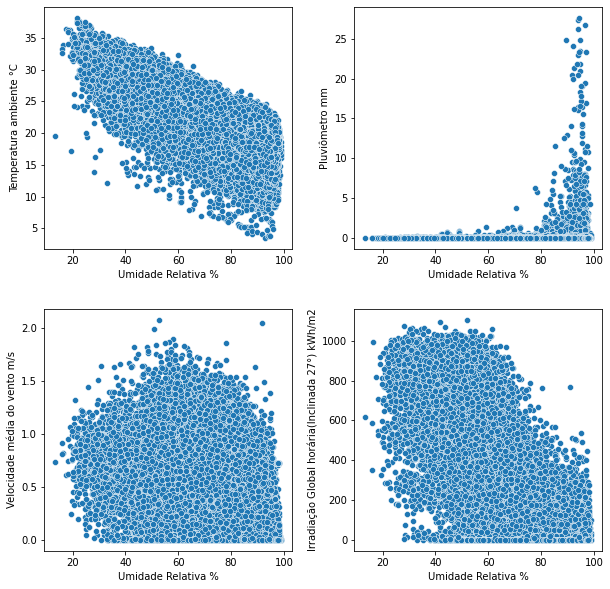

In [ ]:
target = ['Temperatura ambiente °C',
          'Pluviômetro mm',
          'Velocidade média do vento m/s',
          'Irradiação Global horária(Inclinada 27°) kWh/m2']

fig = plt.figure()
fig.subplots_adjust(hspace=0.25, wspace=0.25)
fig.set_figheight(10)
fig.set_figwidth(10)

j = 0

for i in target:
    j += 1
    ax = fig.add_subplot(2, 2, j)
    ax = sns.scatterplot(data = df,
                         x = 'Umidade Relativa %',
                         y = i)

### Analise Temperatura ambiente

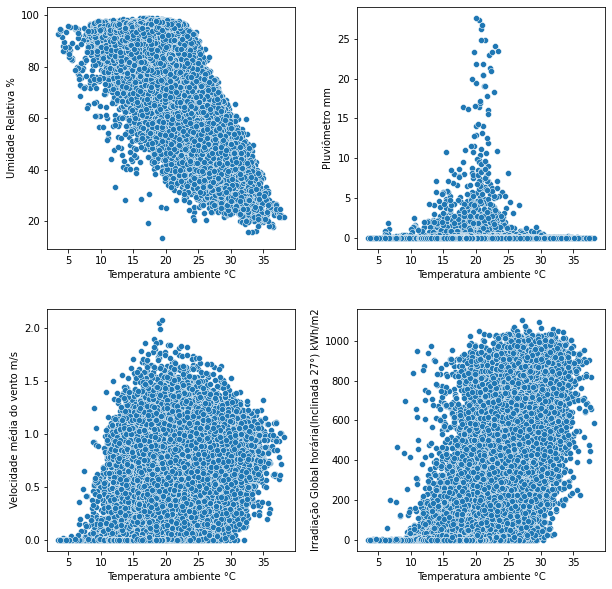

In [ ]:
target = ['Umidade Relativa %',
          'Pluviômetro mm',
          'Velocidade média do vento m/s',
          'Irradiação Global horária(Inclinada 27°) kWh/m2']

fig = plt.figure()
fig.subplots_adjust(hspace=0.25, wspace=0.25)
fig.set_figheight(10)
fig.set_figwidth(10)

j = 0

for i in target:
    j += 1
    ax = fig.add_subplot(2, 2, j)
    ax = sns.scatterplot(data = df,
                         x = 'Temperatura ambiente °C',
                         y = i)

### Analise velocidade do vento

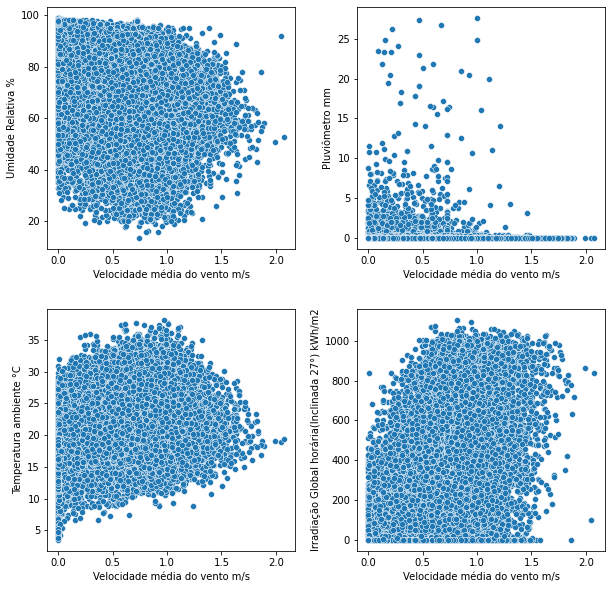

In [ ]:
target = ['Umidade Relativa %',
          'Pluviômetro mm',
          'Temperatura ambiente °C',
          'Irradiação Global horária(Inclinada 27°) kWh/m2']

fig = plt.figure()
fig.subplots_adjust(hspace=0.25, wspace=0.25)
fig.set_figheight(10)
fig.set_figwidth(10)

j = 0

for i in target:
    j += 1
    ax = fig.add_subplot(2, 2, j)
    ax = sns.scatterplot(data = df,
                         x = 'Velocidade média do vento m/s',
                         y = i)

## Analise Irradiação

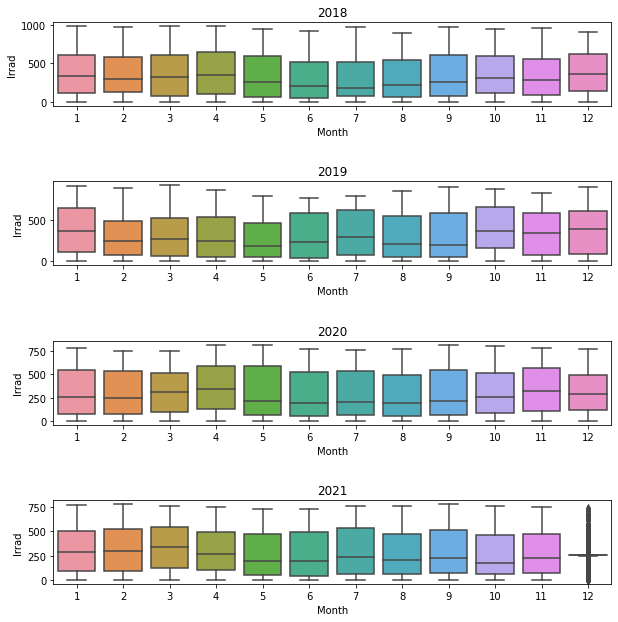

In [ ]:
j = 0
target = ['Irrad',
          'Irradiação Global horária(horizontal) kWh/m2',
          'Irradiação Difusa horária kWh/m2',
          'Irradiação Global horária(Inclinada 27°) kWh/m2']

fig = plt.figure()
fig.subplots_adjust(hspace=0.9, wspace=0.1, bottom = 0.1)
fig.set_figheight(10)
fig.set_figwidth(10)

for i in range(2018,2022):
    j += 1
    count = []
    df_mes = df.loc[(df['Year'] == i) & (df['Hour'] > 6) & (df['Hour'] < 19)]
    ax = fig.add_subplot(4, 1, j)
    ax = sns.boxplot(data = df_mes,
                     y = target[0],
                     x = 'Month')
    plt.title(str(i))

Dropar dados do sistema que retornaram valores maiores que zero às 00:00, tanto na irradiação quanto na potência

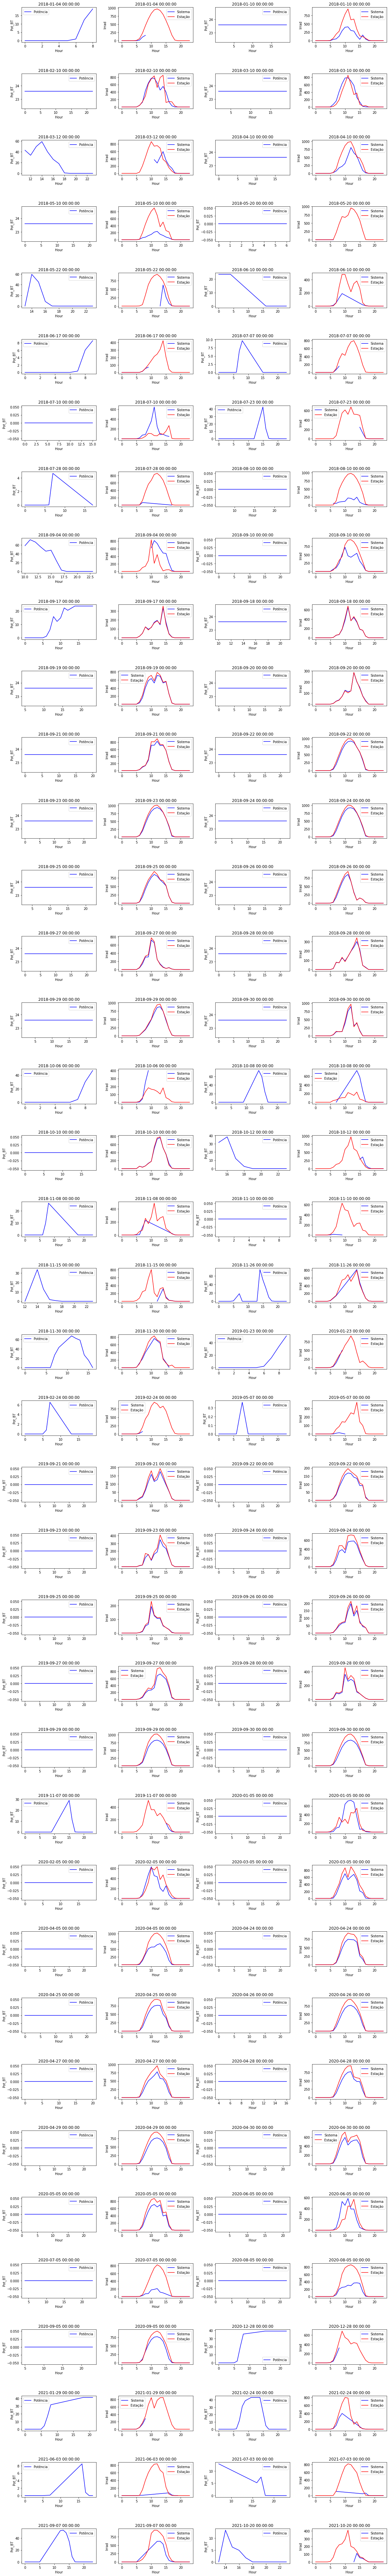

In [ ]:
#Separando a base de dados
df_datas = df[['Day', 'Month', 'Year']].drop_duplicates().reset_index(drop = True)
investiga = []

for i in range (0, len(df_datas)):

  #ajustando dados para identificação do periodo
  dia = df_datas['Day'][i]
  mes = df_datas['Month'][i]
  ano = df_datas['Year'][i]
  if dia < 10:
    dia = '0' + str(dia)
  if mes < 10:
    mes = '0' + str(mes)

  #Identificando os dados pertencentes do dia que será analisado
  primeiro = '{2}-{1}-{0} 00:00:00'.format(dia, mes, ano)
  segundo = '{2}-{1}-{0} 23:00:00'.format(dia, mes, ano)
  avalia = df['Pot_BT'].loc[(df['Date_Time'] >= primeiro) &
                            (df['Date_Time'] <= segundo)].value_counts()

  #se há mais que 10 dados diferentes entra no investiga
  if len(avalia) < 10:
    investiga.append(primeiro)
    investiga.append(segundo)
  else:
    pass

#Criando o local para plotar os dados
fig = plt.figure()
fig.subplots_adjust(hspace=0.9, wspace=0.3, bottom = 0.1)
fig.set_figheight(150)
fig.set_figwidth(20)

#contador de gráficos
j=0

for i in range(0, len(investiga), 2):
  #identifica os dados que serão plotados
  df_investiga = df.loc[(df['Date_Time'] >= investiga[i]) & (df['Date_Time'] <= investiga[i + 1])]

  #só entra as datas que contém dados
  if len(df_investiga.value_counts()) != 0:

    #Plot dos dados da potencia
    j += 1
    ax = fig.add_subplot(42, 4, j)
    ax = sns.lineplot(data = df_investiga,
                x = "Hour",
                y = "Pot_BT",
                label = 'Potência',
                color = 'b')
    plt.title(investiga[i])

    #Plot ao lado os dados da irradiação do sistema e da estação
    j += 1
    ax = fig.add_subplot(42, 4, j)
    ax = sns.lineplot(data = df_investiga,
                x = "Hour",
                y = "Irrad",
                label = 'Sistema',
                color = 'b')
    ax1 = sns.lineplot(data = df_investiga,
                x = "Hour",
                y = 'Irradiação Global horária(Inclinada 27°) kWh/m2',
                label = "Estação",
                color = 'r')
    plt.title(investiga[i])

plt.show()

In [ ]:
#drop dados do investiga
for i in range(0, len(investiga), 2):
  index = df.loc[(df['Date_Time'] >= investiga[i]) & (df['Date_Time'] <= investiga[i + 1])].index
  df.drop(index, inplace = True)

df.reset_index(drop = True)

Date_Time       Temp    Irrad  Pot_BT  \
0      2018-01-01 00:00:00  21.598667    0.000     0.0   
1      2018-01-01 01:00:00  20.926000    0.000     0.0   
2      2018-01-01 02:00:00  20.271417    0.000     0.0   
3      2018-01-01 03:00:00  19.986267    0.000     0.0   
4      2018-01-01 04:00:00  19.997400    0.000     0.0   
...                    ...        ...      ...     ...   
26012  2021-12-31 19:00:00  37.453000  254.819     0.0   
26013  2021-12-31 20:00:00  37.453000  254.819     0.0   
26014  2021-12-31 21:00:00  37.453000  254.819     0.0   
26015  2021-12-31 22:00:00  37.453000  254.819     0.0   
26016  2021-12-31 23:00:00  37.453000  254.819     0.0   

       Irradiação Global horária(horizontal) kWh/m2  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
...                                             ...   
26012                                           0.0   
26013                                           0.0   
26014                                           0.0   
26015                                           0.0   
26016                                           0.0   

       Irradiação Difusa horária kWh/m2  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   
...                                 ...   
26012                               0.0   
26013                               0.0   
26014                               0.0   
26015                               0.0   
26016                               0.0   

       Irradiação Global horária(Inclinada 27°) kWh/m2  \
0                                                  0.0   
1                                                  0.0   
2                                                  0.0   
3                                                  0.0   
4                                                  0.0   
...                                                ...   
26012                                              0.0   
26013                                              0.0   
26014                                              0.0   
26015                                              0.0   
26016                                              0.0   

       Temperatura ambiente °C  Umidade Relativa %  \
0                        21.45                86.0   
1                        21.18                87.5   
2                        20.78                89.2   
3                        20.68                89.4   
4                        20.44                90.1   
...                        ...                 ...   
26012                    19.42                97.1   
26013                    19.42                97.4   
26014                    19.42                97.5   
26015                    18.91                97.6   
26016                    18.52                97.9   

       Velocidade média do vento m/s  ...  dni  dhi   Condicao_ceu  Relacao  \
0                              0.162  ...  0.0  0.0  Not Specified      NaN   
1                              0.106  ...  0.0  0.0  Not Specified      NaN   
2                              0.103  ...  0.0  0.0  Not Specified      NaN   
3                              0.123  ...  0.0  0.0  Not Specified      NaN   
4                              0.039  ...  0.0  0.0  Not Specified      NaN   
...                              ...  ...  ...  ...            ...      ...   
26012                          0.000  ...  0.0  0.0  Not Specified      NaN   
26013                          0.000  ...  0.0  0.0  Not Specified      NaN   
26014                          0.000  ...  NaN  NaN  Not Specified      NaN   
26015 

**2018:**
* Entre 17 e 30 de setembro, leituras erradas de potencia
* Dia 10 de cada mês com leituras de potencia errada

**2019:**
* Entre 21 a 30 de setembro, leituras erradas de potencia

**2020:**
* Abril e Maio com leituras erradas

**2021:**
* 24/02 e 07/09 estão errados?


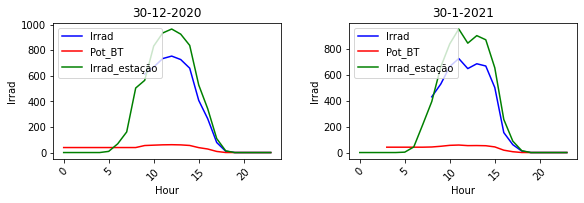

In [ ]:
#Remove ruidos restantes, se baseando em valores de potencia diferentes de 0 em periodos sem sol
df_ruido = df[['Year', 'Month', 'Day']].loc[(df['Pot_BT'] > 0)  & ((df['Hour'] < 5) | (df['Hour'] > 19))]
df_ruido = df_ruido.drop_duplicates().reset_index(drop = True)

fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.3, bottom = 0.1)
fig.set_figheight(75)
fig.set_figwidth(20)
j=0

for i in range (0, len(df_ruido)):
  dia = df_ruido['Day'][i]
  mes = df_ruido['Month'][i]
  ano = df_ruido['Year'][i]
  if dia < 10:
    dia = '0' + str(dia)
  if mes < 10:
    mes = '0' + str(mes)

  primeiro = '{2}-{1}-{0} 00:00:00'.format(dia, mes, ano)
  segundo = '{2}-{1}-{0} 23:00:00'.format(dia, mes, ano)

  t = df.loc[(df['Date_Time'] >= primeiro) & (df['Date_Time'] <= segundo)]

  j += 1
  ax = fig.add_subplot(21, 4, j)
  ax= sns.lineplot(data=t,
                   x = "Hour",
                   y = "Irrad",
                   label = 'Irrad',
                   color = 'b')
  ax1 = sns.lineplot(data=t,
                     x = "Hour",
                     y = "Pot_BT",
                     label = 'Pot_BT',
                     color = 'r')
  ax2 = sns.lineplot(data=t,
                    x = "Hour",
                    y = 'Irradiação Global horária(Inclinada 27°) kWh/m2',
                    label = 'Irrad_estação',
                    color = 'g')

  plt.xticks(rotation = 45)
  plt.title("{0}-{1}-{2}".format(df_ruido['Day'][i], df_ruido['Month'][i], df_ruido['Year'][i]))

  #drop dos dados
  df.drop(t.index, inplace = True)

plt.show()
df.reset_index(drop = True, inplace = True)

Notavel queda da mediana com o decorrer dos anos na potência, enquanto a mediana da irradiação apresenta uma notavel estabilidade

* Condições de céu se repetem?
* Estações do ano se repetem?

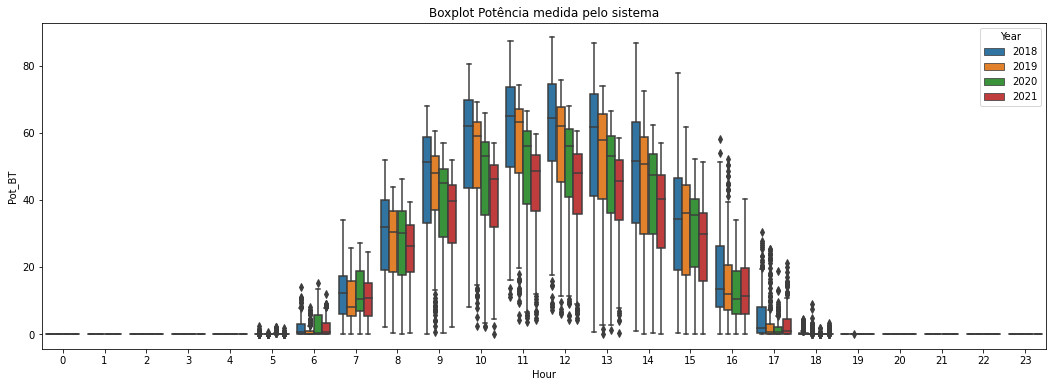

In [ ]:
ax, fig = plt.subplots(figsize = (18,6))
ax = sns.boxplot(data = df,
                 y = 'Pot_BT',
                 x = 'Hour',
                 hue = 'Year')
plt.title('Boxplot Potência medida pelo sistema')
plt.show()

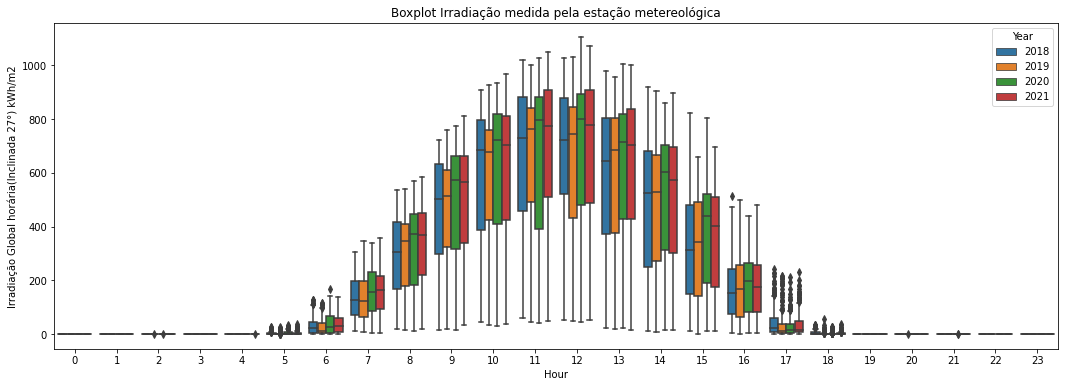

In [ ]:
ax, fig = plt.subplots(figsize = (18,6))
ax = sns.boxplot(data = df,
                 y = 'Irradiação Global horária(Inclinada 27°) kWh/m2',
                 x = 'Hour',
                 hue = 'Year')
plt.title('Boxplot Irradiação medida pela estação metereológica')
plt.show()

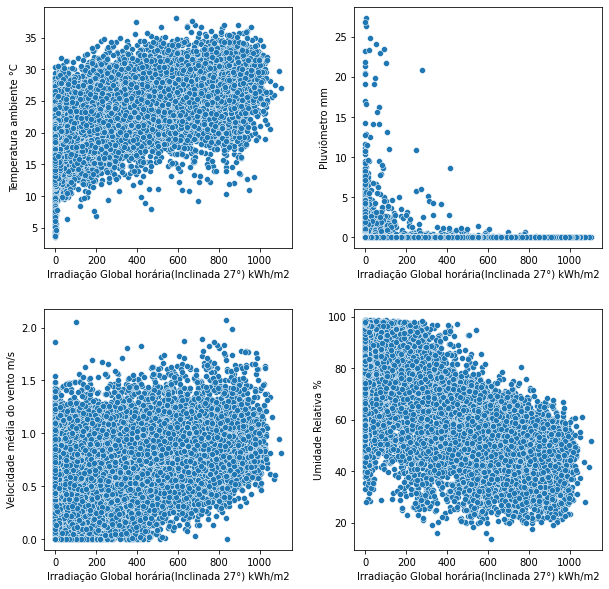

In [ ]:
target = ['Temperatura ambiente °C',
          'Pluviômetro mm',
          'Velocidade média do vento m/s',
          'Umidade Relativa %'          ]

fig = plt.figure()
fig.subplots_adjust(hspace=0.25, wspace=0.25)
fig.set_figheight(10)
fig.set_figwidth(10)

j = 0

for i in target:
    j += 1
    ax = fig.add_subplot(2, 2, j)
    ax = sns.scatterplot(data = df,
                         x = 'Irradiação Global horária(Inclinada 27°) kWh/m2',
                         y = i)

In [ ]:
target = ['Temperatura ambiente °C',
          'Umidade Relativa %',
          'Velocidade média do vento m/s',
          'Pressão Baromêtrica mm Hg',
          'Pluviômetro mm']

irrad = ['Irradiação Global horária(Inclinada 27°) kWh/m2']

df_mi = pd.DataFrame(index = ['MI Irrad Inclinada'])

for i in target:
  mi = []
  for j in irrad:
    mi.append(mutual_info_score(df[j], df[i]))
  df_mi[i] = mi

df_mi

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

Temperatura ambiente °C  Umidade Relativa %  \
MI Irrad Inclinada                 2.648941            2.733763   

                    Velocidade média do vento m/s  Pressão Baromêtrica mm Hg  \
MI Irrad Inclinada                       2.380569                   0.277594   

                    Pluviômetro mm  
MI Irrad Inclinada        0.090446

#Condição

##Claro

In [ ]:
claro = df.loc[df['Condicao_ceu'] == 'Céu claro']

In [ ]:
claro.describe()

Temp        Irrad       Pot_BT  \
count  2156.000000  2156.000000  2171.000000   
mean     46.240042   577.502725    52.336522   
std       9.704950   201.221230    16.024842   
min       8.208444    28.051850     0.000000   
25%      41.093525   478.559596    45.837208   
50%      48.301300   634.616767    54.275433   
75%      53.024904   715.329833    63.215858   
max      65.977650   983.833550    88.378500   

       Irradiação Global horária(horizontal) kWh/m2  \
count                                   2173.000000   
mean                                     687.029452   
std                                      182.941758   
min                                      179.000000   
25%                                      578.000000   
50%                                      677.000000   
75%                                      820.000000   
max                                     1095.000000   

       Irradiação Difusa horária kWh/m2  \
count                       2173.000000   
mean                         215.937414   
std                          159.842106   
min                           35.000000   
25%                          104.000000   
50%                          173.000000   
75%                          261.000000   
max                          898.000000   

       Irradiação Global horária(Inclinada 27°) kWh/m2  \
count                                      2173.000000   
mean                                        756.116889   
std                                         173.765117   
min                                         146.000000   
25%                                         698.000000   
50%                                         797.000000   
75%                                         867.000000   
max                                        1050.000000   

       Temperatura ambiente °C  Umidade Relativa %  \
count               2173.00000         2173.000000   
mean                  26.41751           48.642628   
std                    4.06341           13.865867   
min                   12.02000           13.470000   
25%                   23.83000           38.360000   
50%                   26.49000           48.340000   
75%                   29.20000           58.060000   
max                   37.00000           97.800000   

       Velocidade média do vento m/s  Pressão Baromêtrica mm Hg  ...  \
count                    2173.000000                2173.000000  ...   
mean                        0.851044                 764.463415  ...   
std                         0.287755                   2.711610  ...   
min                         0.000000                 756.000000  ...   
25%                         0.677000                 763.000000  ...   
50%                         0.840000                 764.000000  ...   
75%                         1.038000                 766.000000  ...   
max                         2.074000                 774.000000  ...   

       equation_of_time          ghi          dni          dhi      Relacao  \
count       2173.000000  2173.000000  2173.000000  2173.000000  2173.000000   
mean          -0.261630   764.742434   868.248491    97.828172     0.000897   
std            8.023445   195.143755    76.445676    18.144117     0.000056   
min          -14.202264   191.399185   522.115457    44.281768     0.000800   
25%           -5.954610   647.957431   828.672483    83.420449     0.000849   
50%           -1.065110   754.854381   872.772182    98.142787     0.000896   
75%            3.608962   920.860805   915.736052   109.115354     0.000944   
max           16.455161  1099.340423   992.546827   137.437519     0.001000   

               Day        Month         Year  Minutes         Hour  
count  2173.000000  2173.000000  2173.000000   2173.0  2173.000000  
mean     16.192361     6.572941  2019.681546      0.0    11.661298  
std       8.798951     3.202474     1.139374      0.0     1.827596  
min       1.000000     1.000000  2018.000000      

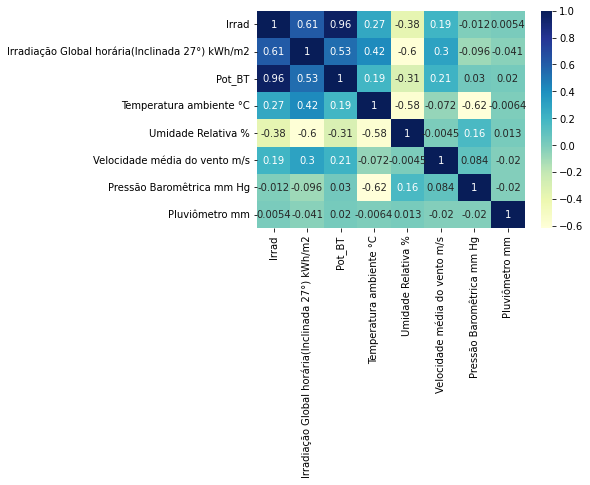

In [ ]:
ax = sns.heatmap(claro[['Irrad',
                        'Irradiação Global horária(Inclinada 27°) kWh/m2',
                        'Pot_BT',
                        'Temperatura ambiente °C',
                        'Umidade Relativa %',
                        'Velocidade média do vento m/s',
                        'Pressão Baromêtrica mm Hg',
                        'Pluviômetro mm']].corr(), cmap="YlGnBu", annot=True)

In [ ]:
target1 = 'Pot_BT'
target2 = 'Irradiação Global horária(Inclinada 27°) kWh/m2'

df_corr = pd.DataFrame()

for i in range(2018, 2022):
  corr = claro[[target1 , target2]].loc[claro['Year'] == i].corr()
  df_corr[str(i)] = [corr.iloc[0,1]]

df_corr

2018      2019      2020      2021
0  0.701728  0.493923  0.620663  0.618653

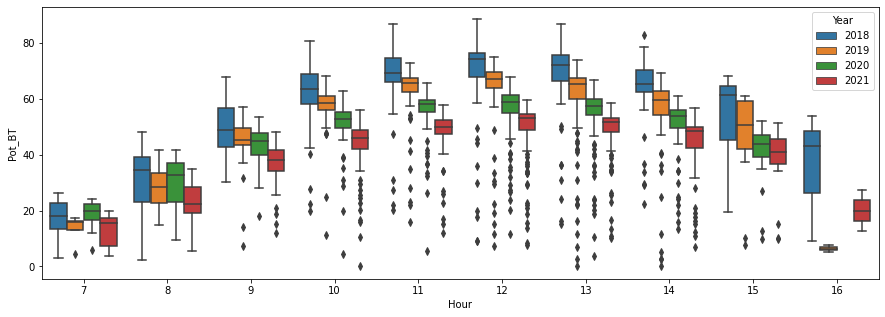

In [ ]:
ax, fig = plt.subplots(figsize = (15,5))
ax = sns.boxplot(data = claro,
                 y = 'Pot_BT',
                 x = 'Hour',
                 hue = 'Year')

##Nublado

In [ ]:
nublado = df.loc[df['Condicao_ceu'] == 'Céu nublado']

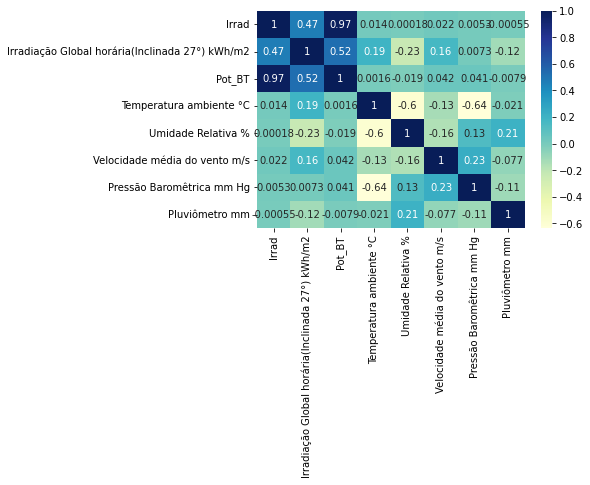

In [ ]:
ax = sns.heatmap(nublado[['Irrad',
                        'Irradiação Global horária(Inclinada 27°) kWh/m2',
                        'Pot_BT',
                        'Temperatura ambiente °C',
                        'Umidade Relativa %',
                        'Velocidade média do vento m/s',
                        'Pressão Baromêtrica mm Hg',
                        'Pluviômetro mm']].corr(), cmap="YlGnBu", annot=True)

In [ ]:
target1 = 'Pot_BT'
target2 = 'Irradiação Global horária(Inclinada 27°) kWh/m2'

df_corr = pd.DataFrame()

for i in range(2018, 2022):
  corr = nublado[[target1 , target2]].loc[nublado['Year'] == i].corr()
  df_corr[str(i)] = [corr.iloc[0,1]]

df_corr

2018      2019      2020      2021
0  0.539001  0.446868  0.606804  0.587522

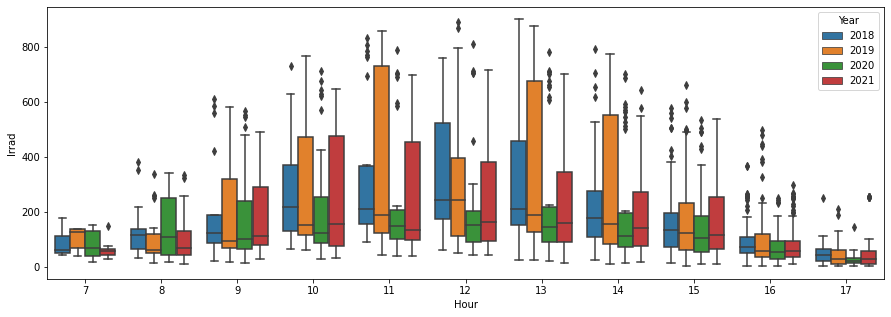

In [ ]:
ax, fig = plt.subplots(figsize = (15,5))
ax = sns.boxplot(data = nublado,
                 y = 'Irrad',
                 x = 'Hour',
                 hue = 'Year')

##Parcialmente nublado

In [ ]:
pnublado = df.loc[df['Condicao_ceu'] == 'Céu parcialmente nublado']

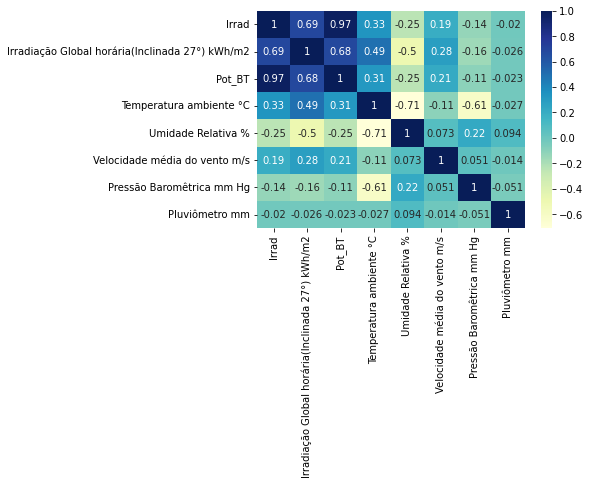

In [ ]:
ax = sns.heatmap(pnublado[['Irrad',
                        'Irradiação Global horária(Inclinada 27°) kWh/m2',
                        'Pot_BT',
                        'Temperatura ambiente °C',
                        'Umidade Relativa %',
                        'Velocidade média do vento m/s',
                        'Pressão Baromêtrica mm Hg',
                        'Pluviômetro mm']].corr(), cmap="YlGnBu", annot=True)

In [ ]:
target1 = 'Pot_BT'
target2 = 'Irradiação Global horária(Inclinada 27°) kWh/m2'

df_corr = pd.DataFrame()

for i in range(2018, 2022):
  corr = pnublado[[target1 , target2]].loc[pnublado['Year'] == i].corr()
  df_corr[str(i)] = [corr.iloc[0,1]]

df_corr

2018      2019      2020      2021
0  0.717333  0.720713  0.718442  0.727624

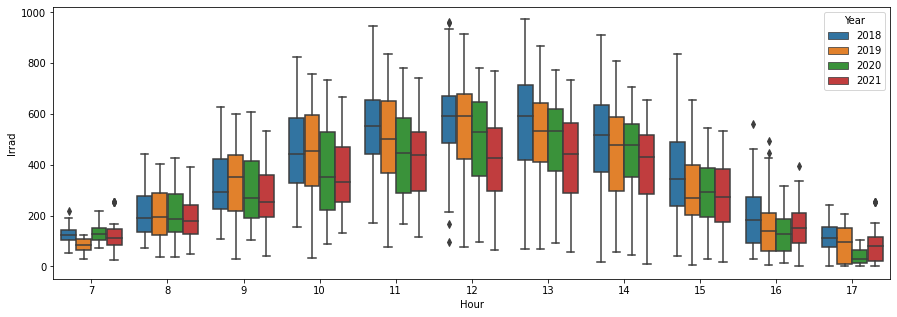

In [ ]:
ax, fig = plt.subplots(figsize = (15,5))
ax = sns.boxplot(data = pnublado,
                 y = 'Irrad',
                 x = 'Hour',
                 hue = 'Year')

##Mais que claro

In [ ]:
mclaro= df.loc[df['Condicao_ceu'] == 'Céu claro (maior que 1)']

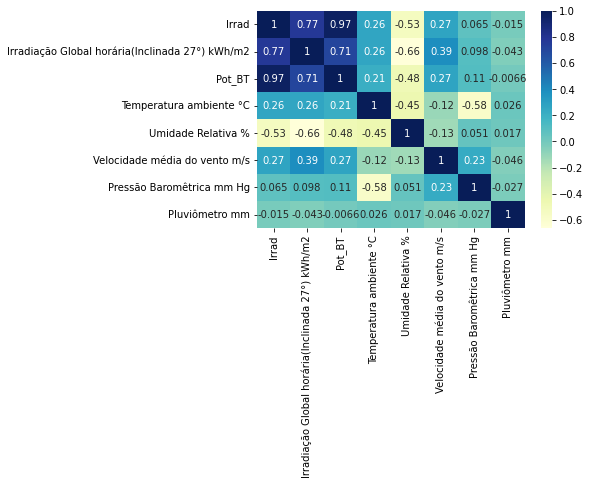

In [ ]:
ax = sns.heatmap(mclaro[['Irrad',
                        'Irradiação Global horária(Inclinada 27°) kWh/m2',
                        'Pot_BT',
                        'Temperatura ambiente °C',
                        'Umidade Relativa %',
                        'Velocidade média do vento m/s',
                        'Pressão Baromêtrica mm Hg',
                        'Pluviômetro mm']].corr(), cmap="YlGnBu", annot=True)

In [ ]:
target1 = 'Pot_BT'
target2 = 'Irradiação Global horária(Inclinada 27°) kWh/m2'

df_corr = pd.DataFrame()

for i in range(2018, 2022):
  corr = mclaro[[target1 , target2]].loc[mclaro['Year'] == i].corr()
  df_corr[str(i)] = [corr.iloc[0,1]]

df_corr

2018      2019      2020      2021
0  0.808435  0.718749  0.757924  0.778203

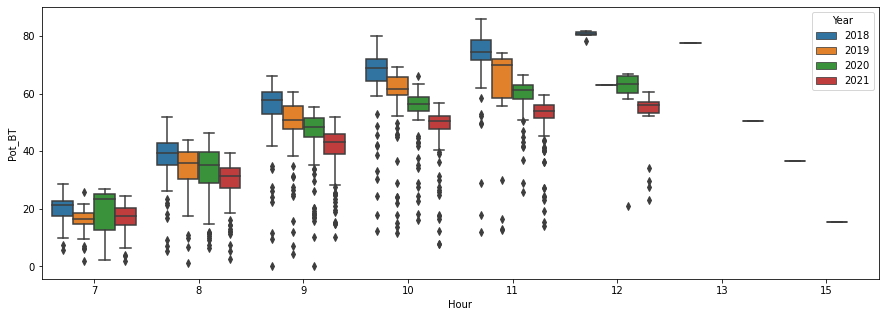

In [ ]:
ax, fig = plt.subplots(figsize = (15,5))
ax = sns.boxplot(data = mclaro,
                 y = 'Pot_BT',
                 x = 'Hour',
                 hue = 'Year')

#Estação

##Verão

In [ ]:
verao = df.loc[df['Estação'] == 'Verão']

2018


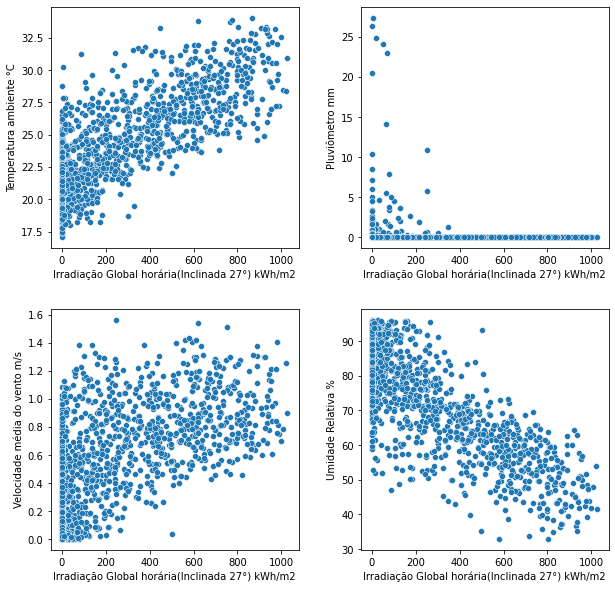

2019


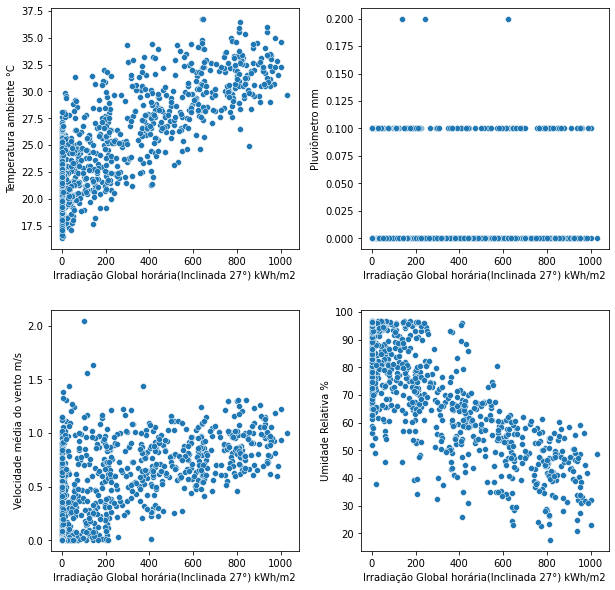

2020


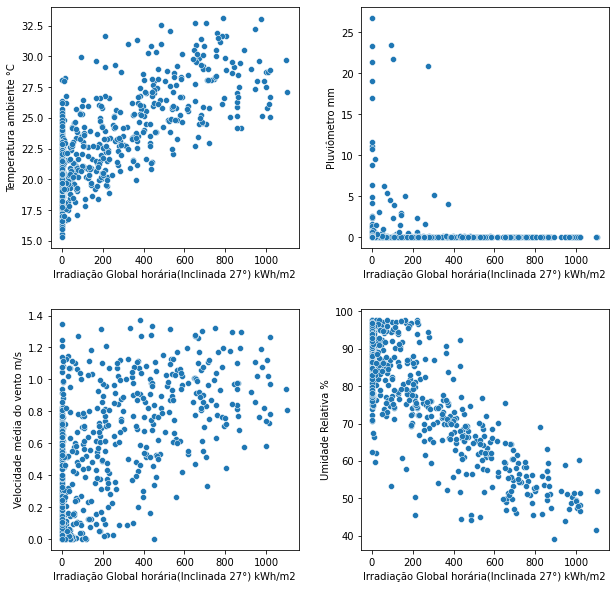

2021


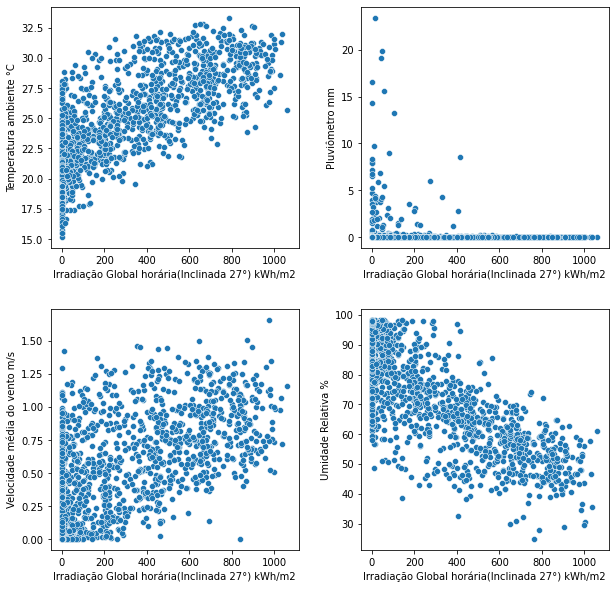

In [ ]:
target = ['Temperatura ambiente °C',
          'Pluviômetro mm',
          'Velocidade média do vento m/s',
          'Umidade Relativa %']



for y in range (2018,2022):

  fig = plt.figure()
  fig.subplots_adjust(hspace=0.25, wspace=0.25)
  fig.set_figheight(10)
  fig.set_figwidth(10)

  j=0
  print(y)
  for i in target:
      j += 1
      ax = fig.add_subplot(2, 2, j)
      ax = sns.scatterplot(data = verao.loc[verao['Year'] == y],
                          x = 'Irradiação Global horária(Inclinada 27°) kWh/m2',
                          y = i)
  plt.show()


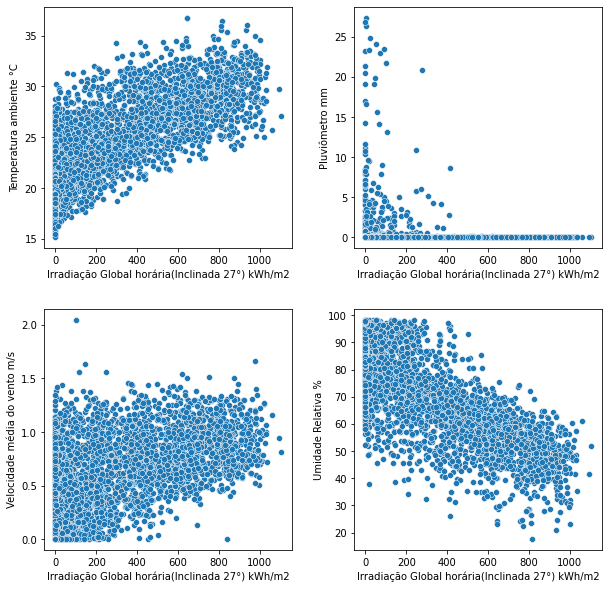

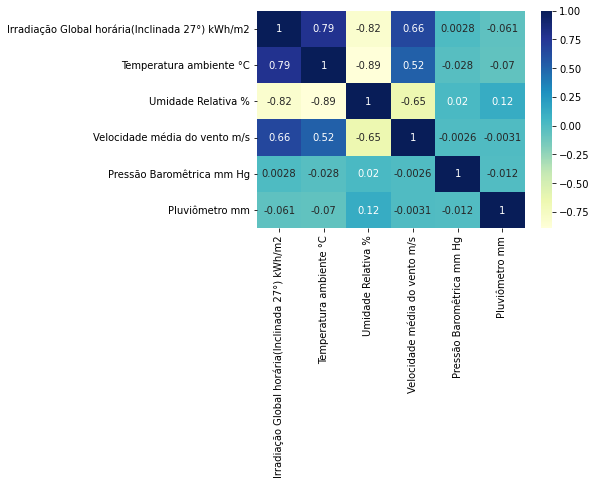

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

Temperatura ambiente °C  Umidade Relativa %  \
MI Irrad Inclinada                 3.375854              3.3426   

                    Velocidade média do vento m/s  Pressão Baromêtrica mm Hg  \
MI Irrad Inclinada                       3.263391                   0.516451   

                    Pluviômetro mm  
MI Irrad Inclinada        0.221118

In [ ]:
target = ['Temperatura ambiente °C',
          'Pluviômetro mm',
          'Velocidade média do vento m/s',
          'Umidade Relativa %']

fig = plt.figure()
fig.subplots_adjust(hspace=0.25, wspace=0.25)
fig.set_figheight(10)
fig.set_figwidth(10)

j = 0

for i in target:
    j += 1
    ax = fig.add_subplot(2, 2, j)
    ax = sns.scatterplot(data = verao,
                         x = 'Irradiação Global horária(Inclinada 27°) kWh/m2',
                         y = i)

plt.show()

ax = sns.heatmap(verao[['Irradiação Global horária(Inclinada 27°) kWh/m2',
                        'Temperatura ambiente °C',
                        'Umidade Relativa %',
                        'Velocidade média do vento m/s',
                        'Pressão Baromêtrica mm Hg',
                        'Pluviômetro mm']].corr(), cmap="YlGnBu", annot=True)

print('\n')

plt.show()

print('\n')

target = ['Temperatura ambiente °C',
          'Umidade Relativa %',
          'Velocidade média do vento m/s',
          'Pressão Baromêtrica mm Hg',
          'Pluviômetro mm']

irrad = ['Irradiação Global horária(Inclinada 27°) kWh/m2']

df_mi = pd.DataFrame(index = ['MI Irrad Inclinada'])

for i in target:
  mi = []
  for j in irrad:
    mi.append(mutual_info_score(verao[j], verao[i]))
  df_mi[i] = mi

df_mi

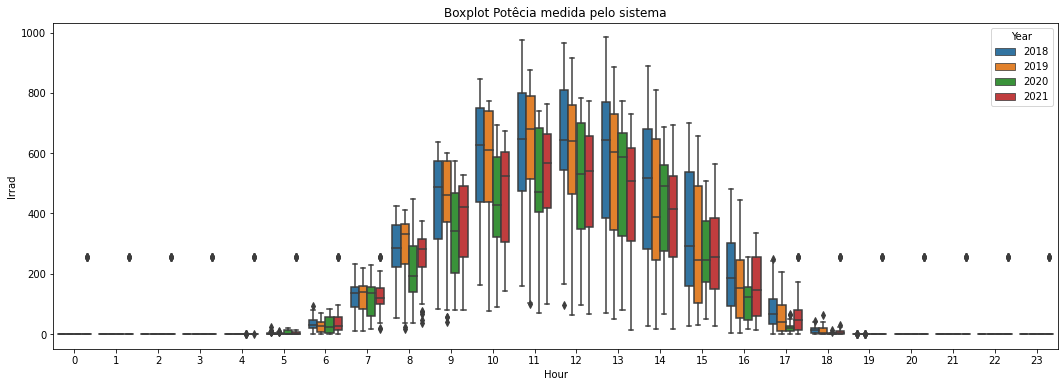

In [ ]:
ax, fig = plt.subplots(figsize = (18,6))
ax = sns.boxplot(data = verao,
                 y = 'Irrad',
                 x = 'Hour',
                 hue = 'Year')
plt.title('Boxplot Potêcia medida pelo sistema')
plt.show()

##Primavera

In [ ]:
primavera = df.loc[df['Estação'] == 'Primavera']

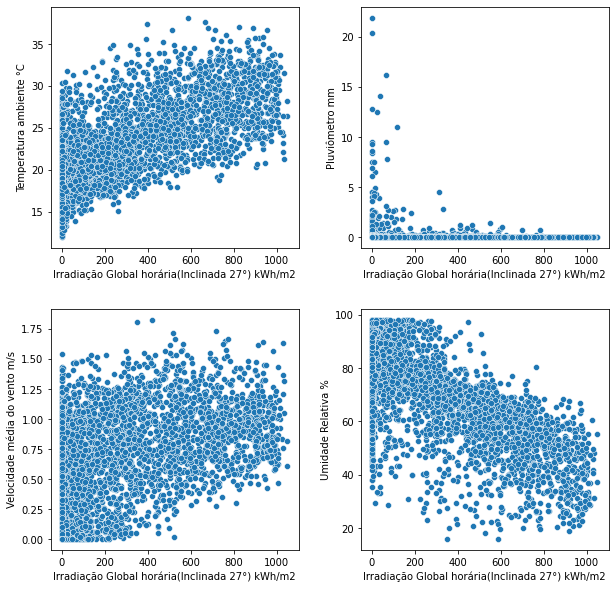

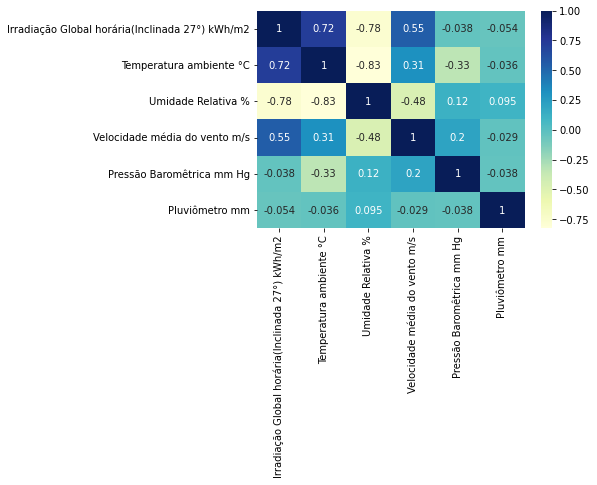

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


Temperatura ambiente °C  Umidade Relativa %  \
MI Irrad Inclinada                  3.41085            3.291818   

                    Velocidade média do vento m/s  Pressão Baromêtrica mm Hg  \
MI Irrad Inclinada                       3.284507                   0.596954   

                    Pluviômetro mm  
MI Irrad Inclinada        0.156198

In [ ]:
target = ['Temperatura ambiente °C',
          'Pluviômetro mm',
          'Velocidade média do vento m/s',
          'Umidade Relativa %'          ]

fig = plt.figure()
fig.subplots_adjust(hspace=0.25, wspace=0.25)
fig.set_figheight(10)
fig.set_figwidth(10)

j = 0

for i in target:
    j += 1
    ax = fig.add_subplot(2, 2, j)
    ax = sns.scatterplot(data = primavera,
                         x = 'Irradiação Global horária(Inclinada 27°) kWh/m2',
                         y = i)

plt.show()

ax = sns.heatmap(primavera[['Irradiação Global horária(Inclinada 27°) kWh/m2',
                        'Temperatura ambiente °C',
                        'Umidade Relativa %',
                        'Velocidade média do vento m/s',
                        'Pressão Baromêtrica mm Hg',
                        'Pluviômetro mm']].corr(), cmap="YlGnBu", annot=True)

print('\n')

plt.show()

print('\n')

target = ['Temperatura ambiente °C',
          'Umidade Relativa %',
          'Velocidade média do vento m/s',
          'Pressão Baromêtrica mm Hg',
          'Pluviômetro mm']

irrad = ['Irradiação Global horária(Inclinada 27°) kWh/m2']

df_mi = pd.DataFrame(index = ['MI Irrad Inclinada'])

for i in target:
  mi = []
  for j in irrad:
    mi.append(mutual_info_score(primavera[j], primavera[i]))
  df_mi[i] = mi

df_mi

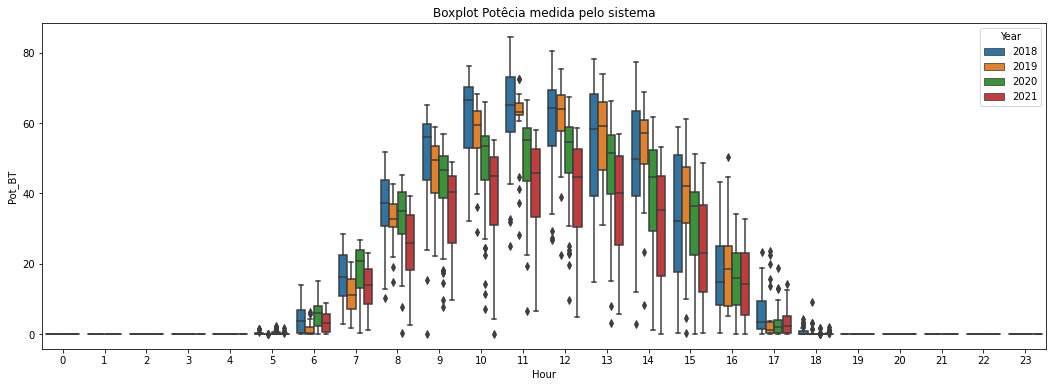

In [ ]:
ax, fig = plt.subplots(figsize = (18,6))
ax = sns.boxplot(data = primavera,
                 y = 'Pot_BT',
                 x = 'Hour',
                 hue = 'Year')
plt.title('Boxplot Potêcia medida pelo sistema')
plt.show()

##Outono

In [ ]:
outono = df.loc[df['Estação'] == 'Outono']

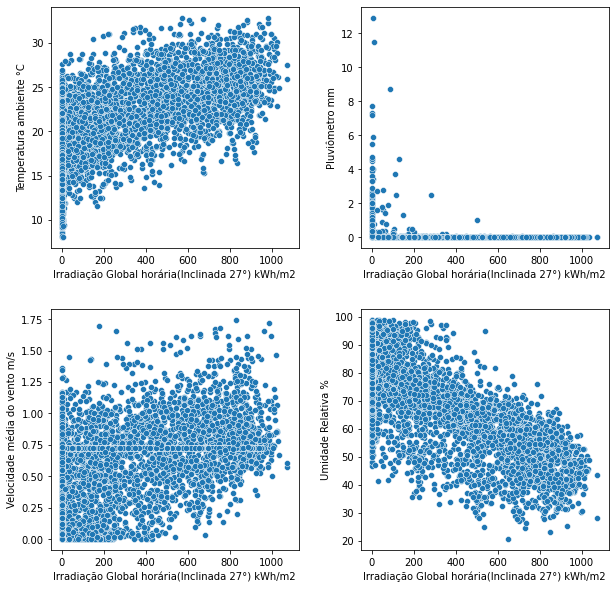

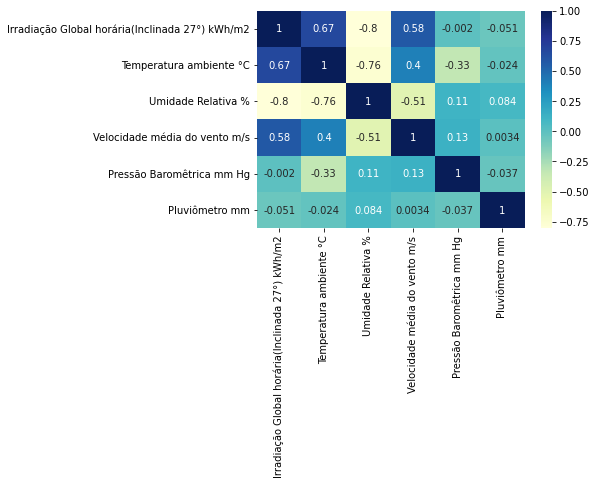

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


Temperatura ambiente °C  Umidade Relativa %  \
MI Irrad Inclinada                 3.008779            3.074814   

                    Velocidade média do vento m/s  Pressão Baromêtrica mm Hg  \
MI Irrad Inclinada                       2.612712                   0.531525   

                    Pluviômetro mm  
MI Irrad Inclinada        0.061228

In [ ]:
target = ['Temperatura ambiente °C',
          'Pluviômetro mm',
          'Velocidade média do vento m/s',
          'Umidade Relativa %'          ]

fig = plt.figure()
fig.subplots_adjust(hspace=0.25, wspace=0.25)
fig.set_figheight(10)
fig.set_figwidth(10)

j = 0

for i in target:
    j += 1
    ax = fig.add_subplot(2, 2, j)
    ax = sns.scatterplot(data = outono,
                         x = 'Irradiação Global horária(Inclinada 27°) kWh/m2',
                         y = i)

plt.show()

ax = sns.heatmap(outono[['Irradiação Global horária(Inclinada 27°) kWh/m2',
                        'Temperatura ambiente °C',
                        'Umidade Relativa %',
                        'Velocidade média do vento m/s',
                        'Pressão Baromêtrica mm Hg',
                        'Pluviômetro mm']].corr(), cmap="YlGnBu", annot=True)

print('\n')

plt.show()

print('\n')

target = ['Temperatura ambiente °C',
          'Umidade Relativa %',
          'Velocidade média do vento m/s',
          'Pressão Baromêtrica mm Hg',
          'Pluviômetro mm']

irrad = ['Irradiação Global horária(Inclinada 27°) kWh/m2']

df_mi = pd.DataFrame(index = ['MI Irrad Inclinada'])

for i in target:
  mi = []
  for j in irrad:
    mi.append(mutual_info_score(outono[j], outono[i]))
  df_mi[i] = mi

df_mi

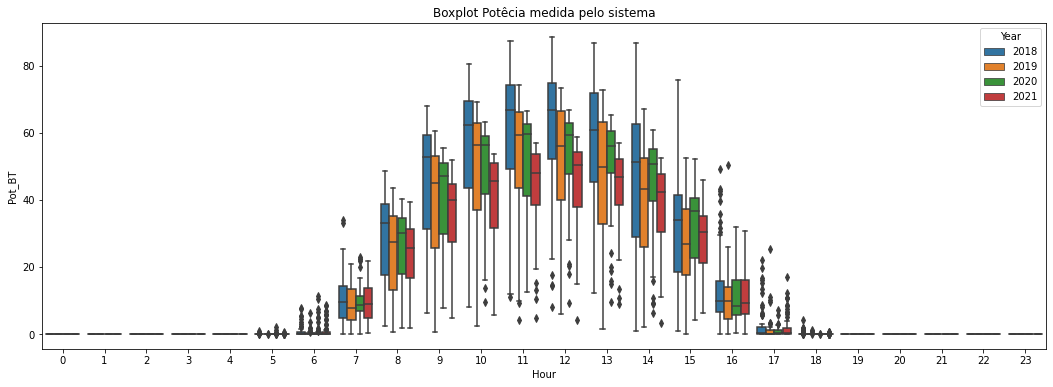

In [ ]:
ax, fig = plt.subplots(figsize = (18,6))
ax = sns.boxplot(data = outono,
                 y = 'Pot_BT',
                 x = 'Hour',
                 hue = 'Year')
plt.title('Boxplot Potêcia medida pelo sistema')
plt.show()

##Inverno

In [ ]:
inverno = df.loc[df['Estação'] == 'Inverno']

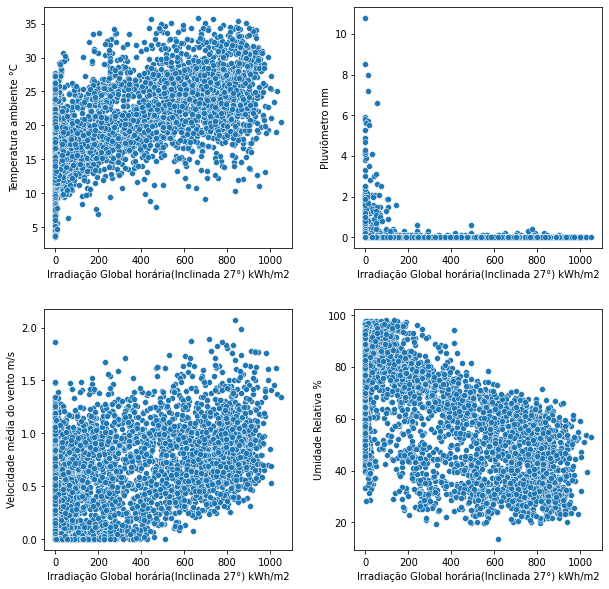

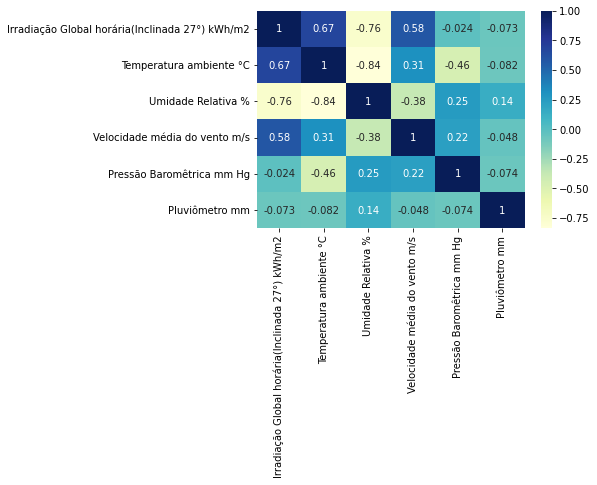

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


Temperatura ambiente °C  Umidade Relativa %  \
MI Irrad Inclinada                 3.059369            3.055374   

                    Velocidade média do vento m/s  Pressão Baromêtrica mm Hg  \
MI Irrad Inclinada                       2.800709                   0.568103   

                    Pluviômetro mm  
MI Irrad Inclinada        0.106248

In [ ]:
target = ['Temperatura ambiente °C',
          'Pluviômetro mm',
          'Velocidade média do vento m/s',
          'Umidade Relativa %'          ]

fig = plt.figure()
fig.subplots_adjust(hspace=0.25, wspace=0.25)
fig.set_figheight(10)
fig.set_figwidth(10)

j = 0

for i in target:
    j += 1
    ax = fig.add_subplot(2, 2, j)
    ax = sns.scatterplot(data = inverno,
                         x = 'Irradiação Global horária(Inclinada 27°) kWh/m2',
                         y = i)

plt.show()

ax = sns.heatmap(inverno[['Irradiação Global horária(Inclinada 27°) kWh/m2',
                        'Temperatura ambiente °C',
                        'Umidade Relativa %',
                        'Velocidade média do vento m/s',
                        'Pressão Baromêtrica mm Hg',
                        'Pluviômetro mm']].corr(), cmap="YlGnBu", annot=True)

print('\n')

plt.show()

print('\n')

target = ['Temperatura ambiente °C',
          'Umidade Relativa %',
          'Velocidade média do vento m/s',
          'Pressão Baromêtrica mm Hg',
          'Pluviômetro mm']

irrad = ['Irradiação Global horária(Inclinada 27°) kWh/m2']

df_mi = pd.DataFrame(index = ['MI Irrad Inclinada'])

for i in target:
  mi = []
  for j in irrad:
    mi.append(mutual_info_score(inverno[j], inverno[i]))
  df_mi[i] = mi

df_mi

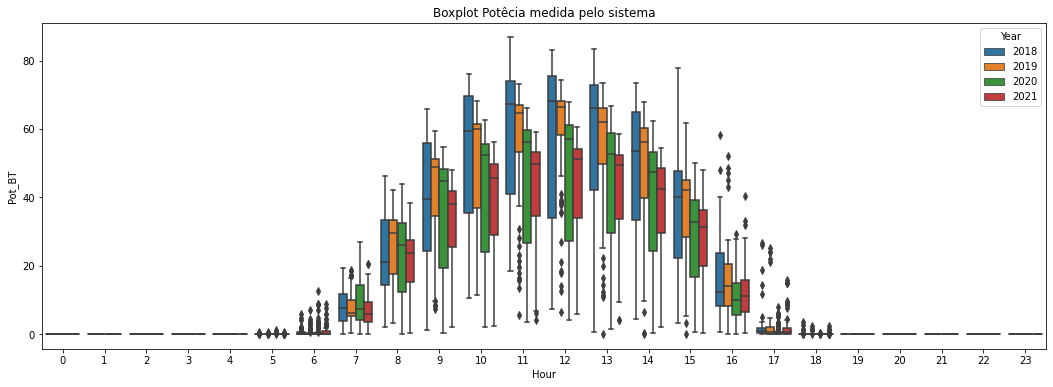

In [ ]:
ax, fig = plt.subplots(figsize = (18,6))
ax = sns.boxplot(data = inverno,
                 y = 'Pot_BT',
                 x = 'Hour',
                 hue = 'Year')
plt.title('Boxplot Potêcia medida pelo sistema')
plt.show()

**Informação mutua**
* Quanto de informação uma variável agrega sobre a outra
* 0 ocorre quando as variáveis são independentes

#pos reuniao

<Axes: xlabel='Pot_BT', ylabel='Irrad'>

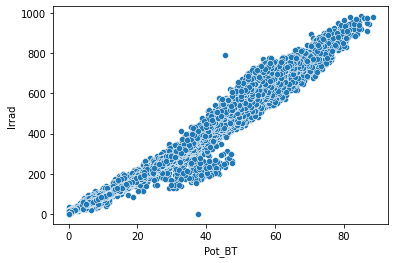

In [ ]:
sns.scatterplot(data = df,
                x = 'Pot_BT',
                y = 'Irrad')

In [ ]:
#Separando a base de dados
df_datas = df[['Day', 'Month', 'Year']].drop_duplicates().reset_index(drop = True)
investiga = []

for i in range (0, len(df_datas)):

  #ajustando dados para identificação do periodo
  dia = df_datas['Day'][i]
  mes = df_datas['Month'][i]
  ano = df_datas['Year'][i]
  if dia < 10:
    dia = '0' + str(dia)
  if mes < 10:
    mes = '0' + str(mes)

  #Identificando os dados pertencentes do dia que será analisado
  primeiro = '{2}-{1}-{0} 00:00:00'.format(dia, mes, ano)
  segundo = '{2}-{1}-{0} 23:00:00'.format(dia, mes, ano)
  avalia = df['Irrad'].loc[(df['Date_Time'] >= primeiro) &
                            (df['Date_Time'] <= segundo)].value_counts()

  #se há mais que 10 dados diferentes entra no investiga
  if len(avalia) < 10:
    investiga.append(primeiro)
    investiga.append(segundo)
  else:
    pass

#Criando o local para plotar os dados
fig = plt.figure()
fig.subplots_adjust(hspace=0.9, wspace=0.3, bottom = 0.1)
fig.set_figheight(150)
fig.set_figwidth(20)

#contador de gráficos
j=0

for i in range(0, len(investiga), 2):
  #identifica os dados que serão plotados
  df_investiga = df.loc[(df['Date_Time'] >= investiga[i]) & (df['Date_Time'] <= investiga[i + 1])]

  #só entra as datas que contém dados
  if len(df_investiga.value_counts()) != 0:

    #Plot dos dados da potencia
    j += 1
    ax = fig.add_subplot(42, 4, j)
    ax = sns.lineplot(data = df_investiga,
                x = "Hour",
                y = "Pot_BT",
                label = 'Potência',
                color = 'b')
    plt.title(investiga[i])

    #Plot ao lado os dados da irradiação do sistema e da estação
    j += 1
    ax = fig.add_subplot(42, 4, j)
    ax = sns.lineplot(data = df_investiga,
                x = "Hour",
                y = "Irrad",
                label = 'Sistema',
                color = 'b')
    ax1 = sns.lineplot(data = df_investiga,
                x = "Hour",
                y = 'Irradiação Global horária(Inclinada 27°) kWh/m2',
                label = "Estação",
                color = 'r')
    plt.title(investiga[i])

plt.show()

<Axes: xlabel='Pot_BT', ylabel='Irrad'>

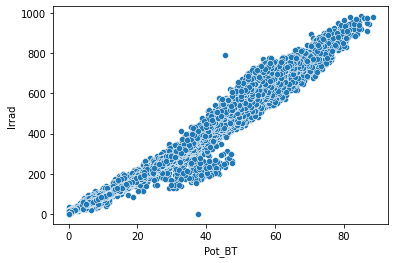

In [ ]:
#drop dados do investiga
for i in range(0, len(investiga), 2):
  index = df.loc[(df['Date_Time'] >= investiga[i]) & (df['Date_Time'] <= investiga[i + 1])].index
  df.drop(index, inplace = True)

df.reset_index(drop = True)

sns.scatterplot(data = df,
                x = 'Pot_BT',
                y = 'Irrad')

<Axes: xlabel='Pot_BT', ylabel='Irrad'>

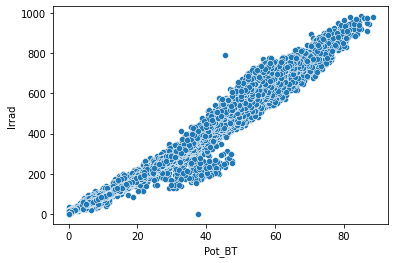

In [ ]:
sns.scatterplot(data = df.loc[((df['Pot_BT'] > 30) & (df['Pot_BT'] < 50)) & (df['Irrad'] < 230)],
                x = 'Pot_BT',
                y = 'Irrad')

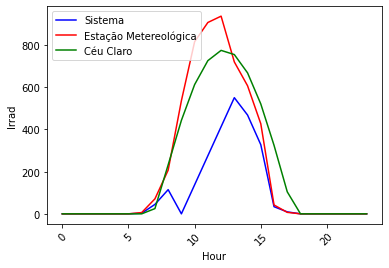

In [ ]:
analise_dia(8,8,2021) #ponto mais isolado inferiormente

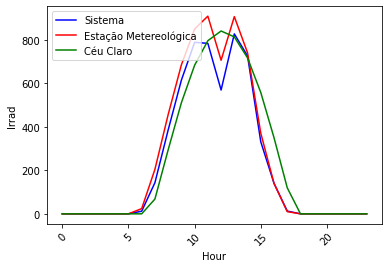

In [ ]:
analise_dia(13,4,2018) #ponto mais isolado superiormente

parte do mann kendall

In [ ]:
relacao_irrad = df['Irrad']/df['Irradiação Global horária(Inclinada 27°) kWh/m2']

In [ ]:
pip install pymannkendall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import statsmodels.api as sm
import pymannkendall as mk

In [ ]:
df_analisa = df[['Date_Time', 'Pot_BT']]
#df_analisa['Date_Time'] = pd.to_datetime(df_analisa['Date_Time'])
df_analisa.info()
df_analisa.set_index('Date_Time', inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25489 entries, 0 to 25560
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date_Time  25489 non-null  object 
 1   Pot_BT     25381 non-null  float64
dtypes: float64(1), object(1)
memory usage: 597.4+ KB


In [ ]:
mk_teste = mk.correlated_seasonal_test(df_analisa)
mk_teste

Correlated_Seasonal_Mann_Kendall_test(trend='decreasing', h=True, p=0.0, z=-11.929636007170192, Tau=-0.04369363691739441, s=-1152283.0, var_s=9329619324.333334, slope=0.0, intercept=0.0293166666666666)

In [ ]:
mk_df = pd.DataFrame(index = ['trend', 'h', 'p', 'z', 'tau', 's', 'var_s', 'slope', 'intercept'])


Full
trend             decreasing
h                       True
p                        0.0
z                 -11.929636
tau                -0.043694
s                 -1152283.0
var_s      9329619324.333334
slope                    0.0
intercept           0.029317

In [ ]:
mk_df = pd.DataFrame(index = ['trend', 'h', 'p', 'z', 'tau', 's', 'var_s', 'slope', 'intercept'])
for mes in range (1,13):
  data = df[['Date_Time', 'Pot_BT']].loc[df['Month'] == mes]
  data.set_index('Date_Time', inplace = True)
  mk_teste = mk.correlated_seasonal_test(data)
  mk_df[str(mes)] = mk_teste

mk_df

1           2               3               4  \
trend          decreasing  decreasing      decreasing      decreasing   
h                    True        True            True            True   
p                0.000074    0.003008        0.020921        0.000005   
z               -3.963777   -2.966953        -2.30941       -4.565862   
tau             -0.047245   -0.039264       -0.029728       -0.047523   
s                 -8435.0     -5336.0         -3622.0        -11235.0   
var_s      4528473.666667   3234524.0  2459772.666667  6054810.333333   
slope                 0.0         0.0             0.0             0.0   
intercept        0.352617    0.159417         0.02765         0.01215   

                    5           6               7               8  \
trend      decreasing  decreasing      decreasing      decreasing   
h                True        True            True            True   
p            0.000004    0.000002             0.0        0.003499   
z           -4.618981   -4.789225       -5.148336       -2.920138   
tau         -0.045614   -0.050539       -0.057803       -0.031312   
s            -12710.0    -13056.0        -11934.0         -8806.0   
var_s       7571794.0   7431728.0  5373265.333333  9093910.666667   
slope             0.0         0.0             0.0             0.0   
intercept    0.000975         0.0        0.001267          0.0025   

                        9              10          11              12  
trend          decreasing      decreasing  decreasing      decreasing  
h                    True            True        True            True  
p                0.000736        0.000002    0.000909             0.0  
z               -3.375992       -4.803415   -3.317281       -5.258406  
tau             -0.042652       -0.066258   -0.040856       -0.069788  
s                 -6429.0         -7516.0     -6473.0         -8743.0  
var_s      3626469.666667  2448349.333333   3807559.0  2764475.666667  
slope                 0.0             0.0         0.0             0.0  
intercept        0.026717        0.087883    0.249901        0.379883

**Mann Kendall Test**

>[Correlated Seasonal MK Test (correlated_seasonal_test):](https://pypi.org/project/pymannkendall/) This method proposed by Hipel (1994) used, when time series significantly correlated with the preceding one or more months/seasons.

trend='decreasing'
h=True
p=0.0
z=-11.929636007170192
Tau=-0.04369363691739441
s=-1152283.0
var_s=9329619324.333334
slope=0.0
intercept=0.0293166666666666


---


**Referências:**
* [*Análise de tendências e padrões climáticos para a mesorregião do sertão paraibano com ênfase nas energias renováveis*](https://repositorio.ufpb.br/jspui/bitstream/123456789/13502/1/Arquivototal.pdf)

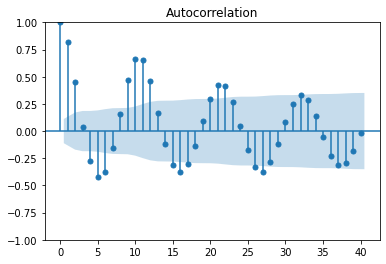

In [ ]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]
sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40)
plt.show()